In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

In [2]:
! pip install elevation

In [3]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import pandas as pd

In [4]:
dem_path = '/content/drive/My Drive/Image Segmentation/'
file_path = dem_path + "Firsoff_HiRISE_5_low_res.tif-adj.tif"
gdal_data = gdal.Open(file_path)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array=[]
data_array = gdal_data.ReadAsArray().astype(np.float)
# data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
data_array.shape

(632, 358)

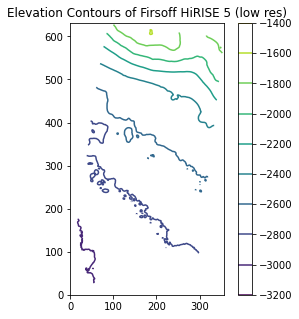

In [9]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array)
plt.title("Elevation Contours of Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

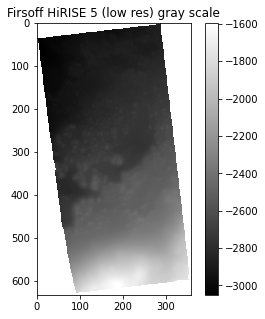

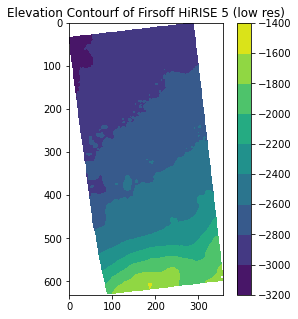

In [10]:
#Plot image in grayscale
plt.figure(figsize=(5,5))
plt.imshow(data_array, cmap = 'gray')
plt.colorbar()
plt.title("Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of Firsoff HiRISE 5 (low res)")
plt.contourf(data_array)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()
